# Precision recall curves and threshold determination

16/09/22

## To do

- Upload the 5 cross validation **training** dataframes
- Determine the precion recall curves for each
- Determine the ideal threshold for each subset using the F1 equation (always on the training dataframe)
- Evaluate the **test set** dataframe using the threshold
- Average the previously obtained thresholds to obtain the final one. 
- Use the final threshold on the benchmark set

## A. Training-test (Done for only 1 crossvalidation iteration)

### a. Precision recall curve

In [41]:
from google.colab import files
uploaded = files.upload()

Saving iteration_0_vh_testing.csv to iteration_0_vh_testing (1).csv
Saving iteration_0_vh_training.csv to iteration_0_vh_training (1).csv
Saving iteration_1_vh_testing.csv to iteration_1_vh_testing.csv
Saving iteration_1_vh_training.csv to iteration_1_vh_training.csv
Saving iteration_2_vh_testing.csv to iteration_2_vh_testing.csv
Saving iteration_2_vh_training.csv to iteration_2_vh_training.csv
Saving iteration_3_vh_testing.csv to iteration_3_vh_testing.csv
Saving iteration_3_vh_training.csv to iteration_3_vh_training.csv
Saving iteration_4_vh_testing.csv to iteration_4_vh_testing.csv
Saving iteration_4_vh_training.csv to iteration_4_vh_training.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sn

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from cf_matrix import make_confusion_matrix

In [ ]:
df_train_0 = pd.read_csv('iteration_0_vh_training.csv')
df_test_0 = pd.read_csv('iteration_0_vh_testing.csv')

In [ ]:
df_train_0.head()

,Unnamed: 0,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,scores
0,0,Q653V7,Oryza sativa subsp. japonica (Rice),Plants,SP,1,MMGSPPAPPARRLGALAVFLLALFLAAPWGVDCGYNVASVAGSKNR...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNN...,14.14
1,1,P15226,Tityus serrulatus (Brazilian scorpion),Metazoa,SP,1,MKGMILFISCLLLIGIVVECKEGYLMDHEGCKLSCFIRPSGYCGRE...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.59
2,2,Q8AV98,Protobothrops flavoviridis (Habu) (Trimeresuru...,Metazoa,SP,1,MGQFIFVSFGFLVVATSLSGTEAGFCCPLGWSSYDEHCYQVFQQKM...,SSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNN...,13.34
3,3,O94985,Homo sapiens (Human),Metazoa,SP,1,MLRRPAPALAPAARLLLAGLLCGGGVWAARVNKHKPWLEPTYHGIV...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNN...,17.02
4,4,P04651,Bos taurus (Bovine),Metazoa,SP,1,MEMFQGLLLWLLLGVAGVWASRGPLRPLCQPINATLAAEKEACPVC...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,19.85


In [ ]:
y_score = df_train_0.loc[:,'scores'].to_list()
y_test_score = df_test_0.loc[:,'scores'].to_list()

extracting y_true

In [ ]:
def sp_to_binary(class_st):
  '''Expects a single string.'''
  if class_st == 'NO_SP':
    return 0
  elif class_st == 'SP':
    return 1
  else:
    return 'NaN'






In [ ]:
# binary representation of the true (observed) class for each testing example: 0=NO_SP, 1=SP
y_true = df_train_0.loc[:,'Class'].apply(sp_to_binary).tolist()
# y_true = [int(val == 'SP') for val in df_train_0.loc[:,'Class'].tolist()] #Alternative formulation
#df_train_0.loc[:,'Class'].apply(sp_to_binary).isna().sum() #checking that it works

In [ ]:
#Precision recall variables
precision, recall, th = precision_recall_curve(y_true, y_score)

In [ ]:
# getting the AUC
roc_auc = auc(recall, precision)

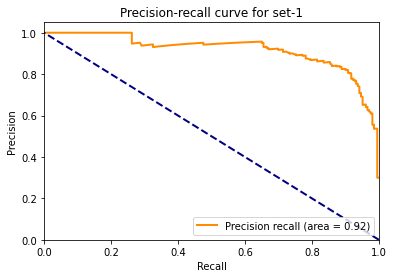

In [37]:
plt.figure()
lw = 2
plt.plot(
    recall,
    precision,
    color="darkorange",
    lw=lw,
    label="Precision recall (area = %0.2f)" % roc_auc,
)
plt.plot([1, 0], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve for set-1")
plt.legend(loc="lower right")
plt.savefig('precision_recall_curve.tiff', bbox_inches='tight')
plt.show()

### b. Getting the best threshold

In [ ]:
# compute f-scores at varying thresholds
fscore = (2 * precision * recall) / (precision + recall)

In [ ]:
# get the index of the maximum value of the f-score
index = np.argmax(fscore)

In [ ]:
# retrieve the threshold value corresponding to the max f-score computed above
optimal_threshold = th[index]

In [ ]:
optimal_threshold

7.61

### c. Accuracy evaluation on the test set

In [ ]:
# classify examples in the testing set
y_pred_test = [int(t_s >= optimal_threshold) for t_s in y_test_score]

In [ ]:
# binary representation of the true (observed) class for each testing example: 0=NO_SP, 1=SP
y_true_test = [int(val == 'SP') for val in df_test_0.loc[:,'Class'].tolist()] 

In [ ]:
# Adding the predicted classification of the test set to the test dataframe
df_test_0.loc[:,'y_pred_test'] = y_pred_test

In [ ]:
df_test_0.head(1)

,Unnamed: 0,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,scores,y_pred_test
0,0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,13.46,1


**Confusion matrix**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
#Confusion matrix for the test set based on the trained threshold
cm = confusion_matrix(y_true_test, y_pred_test)

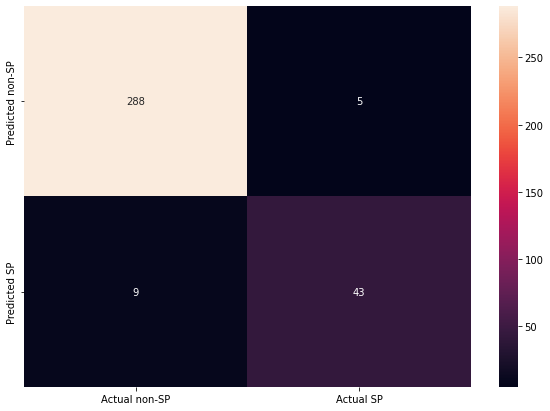

In [ ]:
#Graph the confusion matrix
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d", xticklabels=['Actual non-SP', 'Actual SP'], yticklabels=['Predicted non-SP', 'Predicted SP'])

Alternative confusion matrix:
- We could factorize (R language style) to obtain the levels of the 'Class' variable. This would allow us automatize the procedure for obtaining the row and column names. The function is called `pd.factorize() ` which outputs both the `y_true` variable we already have and also the `levels` variable which is a pandas index type object.

https://stackoverflow.com/questions/61526287/how-to-add-correct-labels-for-seaborn-confusion-matrix

####################################################################
**Now:**
- use accuracy.py to obtain the metrics
- See if you can improve the confusion matrix graphic (add labels)


https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
- Create a graphic representing the scores depending on the actual classification (density distribution)

**2nd attempt at a better confusion matrix based on medium**
https://github.com/DTrimarchi10/confusion_matrix

Adding as a submodule:
https://git-scm.com/book/en/v2/Git-Tools-Submodules

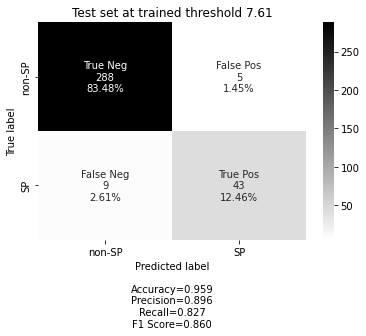

In [47]:
#Using the confusion_matrix module to generate an improved confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['non-SP', 'SP']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Test set at trained threshold %.2f'%(optimal_threshold))
plt.savefig('save_as_a_png.png')

### d. Obtaining the test set distribution

- Create a graphic representing the test scores depending on the actual classification (density distribution)

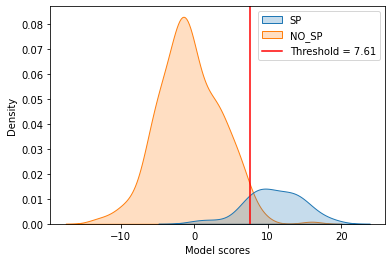

In [95]:
sn.kdeplot(df_test_0.loc[:,'scores'], shade=True, hue=df_test_0.loc[:,'Class']).set(xlabel='Model scores')
children = plt.gca().get_children() #Extracting the plot handles in order to pass them to plt.legend
l = plt.axvline(optimal_threshold, 0, 1, c='r')
plt.legend([children[1], children[0], l], df_test_0.loc[:,'Class'].unique().tolist()+['Threshold = %0.2f'%(optimal_threshold)])

## B. Training-test (all iterations)

In [105]:
#Transforming previous code into a function
def threshold_statistics(n_folds):
  '''
  The number of nfolds must be specified. It is assumed that the function will have the csv files
  will have the following format:
  'iteration_'+str(fold)+'_vh_training.csv'
  'iteration_'+str(fold)+'_vh_testing.csv'
  The input dataframes must also follow a specific format
  '''
  threshold_list = []
  for fold in range(n_folds):
    #Loading training data
    df_train = pd.read_csv('iteration_%d_vh_training.csv'%(fold))
    y_score = df_train.loc[:,'scores'].to_list()
    
    #binary representation of the true (observed) class for each training example: 0=NO_SP, 1=SP
    y_true = [int(val == 'SP') for val in df_train.loc[:,'Class'].tolist()]

    #Precision recall curve
    precision, recall, th = precision_recall_curve(y_true, y_score)
    roc_auc = auc(recall, precision)

    plt.figure()
    lw = 2
    plt.plot(recall, precision, color="darkorange", lw=lw, label="Precision recall (area = %0.2f)" % roc_auc,)
    plt.plot([1, 0], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-recall curve for set-%d"%(fold))
    plt.legend(loc="lower right")
    plt.savefig('precision_recall_curve_%d.png'%(fold), bbox_inches='tight')

    #Getting the best threshold
    fscore = (2 * precision * recall) / (precision + recall)    
    index = np.argmax(fscore)
    optimal_threshold = th[index]
    threshold_list.append(optimal_threshold)       

    #Extracting testing dataframe
    df_test = pd.read_csv('iteration_%d_vh_testing.csv'%(fold))

    #Extracting test set predicted scores
    #y_test_score = df_test.loc[:,'scores'].to_list()

    # classify examples in the testing set using predicted score and trained threshold
    y_pred_test = [int(scr >= optimal_threshold) for scr in df_test.loc[:,'scores'].to_list()]

    # binary representation of the true (observed) class for each testing example: 0=NO_SP, 1=SP
    y_true_test = [int(val == 'SP') for val in df_test.loc[:,'Class'].tolist()]

    #Confusion matrix generation
    cm = confusion_matrix(y_true_test, y_pred_test)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['non-SP', 'SP']
    make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Test set %d at trained threshold %.2f'%(fold, optimal_threshold))
    plt.savefig('test_confusion_matrix_%d.png'%(fold))

    #Score distribution plot
    plt.figure() #ensures a clean canvas before plotting
    sn.kdeplot(df_test.loc[:,'scores'], shade=True, hue=df_test.loc[:,'Class']).set(xlabel='Test set %d score distribution'%(fold))
    children = plt.gca().get_children() #Extracting the plot handles in order to pass them to plt.legend
    l = plt.axvline(optimal_threshold, 0, 1, c='r')
    plt.legend([children[1], children[0], l], df_test_0.loc[:,'Class'].unique().tolist()+['Threshold = %0.2f'%(optimal_threshold)])
    plt.savefig('test_score_dist_%d.png'%(fold))

  return threshold_list



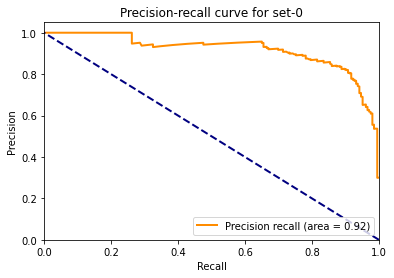

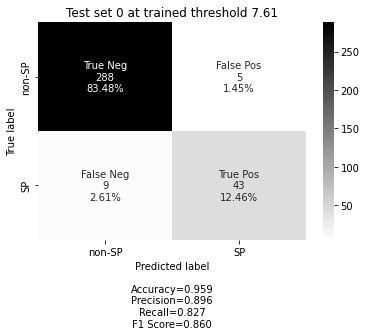

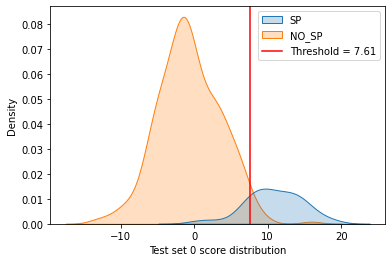

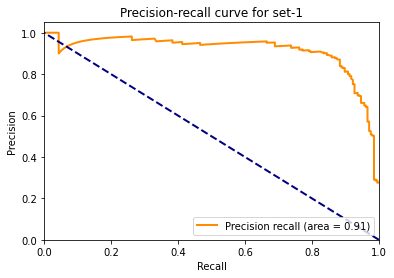

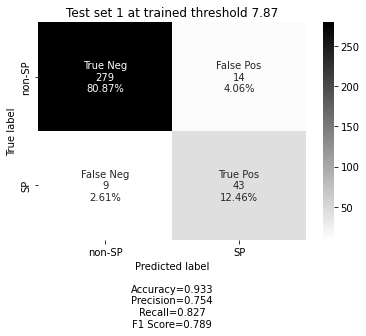

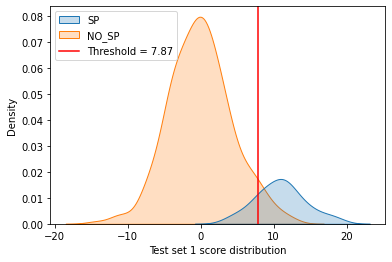

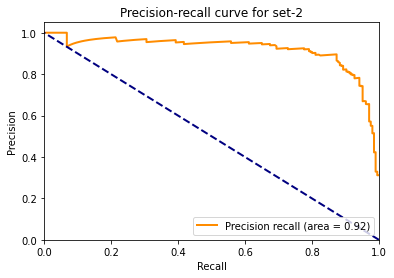

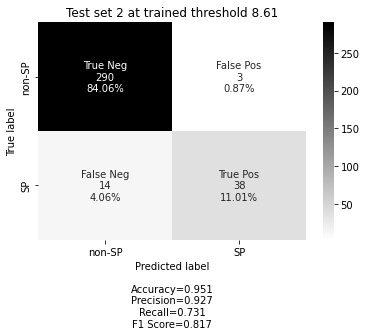

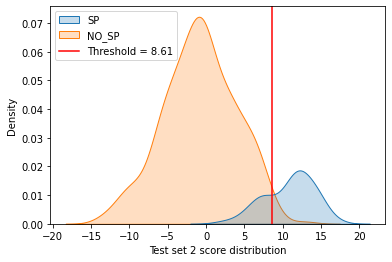

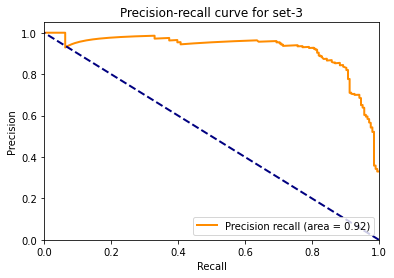

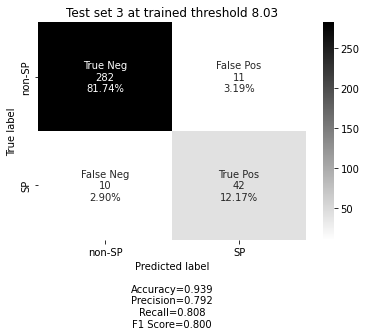

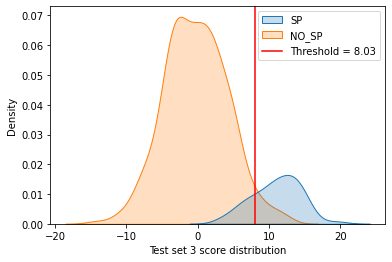

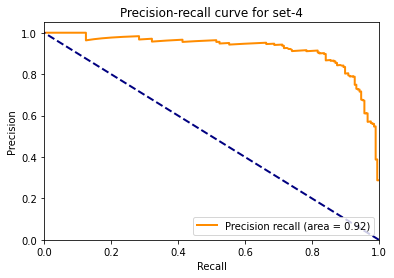

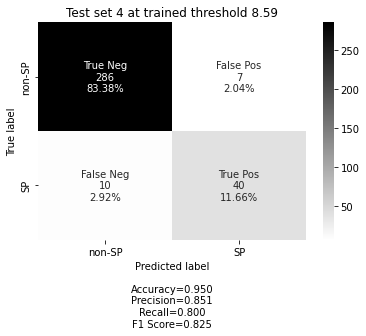

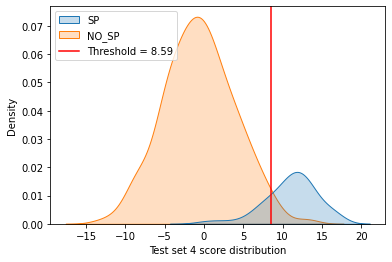

In [106]:
threshold_list = threshold_statistics(5)

In [64]:
threshold_list

[7.61, 7.87, 8.61, 8.03, 8.59]

## C. Evaluating threshold on benchmark

In [65]:
#Converting threshold list to nparray
threshold_list = np.array(threshold_list[:])

In [69]:
#Analizing threshold list statistics
pd.Series(threshold_list[:]).describe()

count    5.000000
mean     8.142000
std      0.444207
min      7.610000
25%      7.870000
50%      8.030000
75%      8.590000
max      8.610000
dtype: float64

In [70]:
#Defining average cross validation threshold as the best
best_threshold = np.average(threshold_list)

In [99]:
#Loading the benchmark set
bench = pd.read_csv('benchmark_set.tsv', sep='\t')

In [100]:
bench.head(1)

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
def benchmark_eval(threshold):
  '''
  The file benchmark_set.tsv is expected. 
  Skewed class statistics will be generated based on an input threshold.
  '''
  bench = pd.read_csv('benchmark_set.tsv', sep='\t')
  # classify examples in the testing set using predicted score and trained threshold
  y_pred = [int(scr >= optimal_threshold) for scr in df_test.loc[:,'scores'].to_list()]

  # binary representation of the true (observed) class for each testing example: 0=NO_SP, 1=SP
  y_true = [int(val == 'SP') for val in df_test.loc[:,'Class'].tolist()]
